In [3]:
# Genesis crawling and classifying (Outer and inner), image generation 

In [12]:
import pandas as pd
import numpy as np
from urllib import request
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen

import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import os 
import time
import urllib
import cv2
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image
import ssl


import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D   
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical

In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten,Conv2D,MaxPool2D,LSTM,MaxPooling2D, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import activations
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image


# from torch.utils.data import TensorDataset, DataLoader
# from torch import optim
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.models import Model
# from keras import optimizers, initializers, regularizers, metrics
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers   # 과적합 방지 
from tensorflow.keras.constraints import MaxNorm

In [2]:
gen_list = ['G70','G70SHOOTINGBRAKE', 'ELECTRIFIEDG80','G80','G90'
         ,'GV60','ELECTRIFIEDGV70','GV70','GV80']

In [3]:
# 구글 이미지 검색 후 스크롤 내리는 함수
def selenium_scroll(driver): 
    SCROLL_PAUSE_SEC = 1
    i = 0
    while i<10:  # 스크롤 내린 후 더보기 버튼이 있다면 클릭
        i += 1    # 없으면 다시 스크롤 내리기 (10번 반복)
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(SCROLL_PAUSE_SEC)
        try:
            btn =  driver.find_element(By.CSS_SELECTOR,'#islmp > div > div > div > div.gBPM8 > div.qvfT1 > div.YstHxe > input')
            btn.click()
        except:
            pass

# 이미지 url을 np.array로 바꿔주는 함수       
def url_to_image(url, readFlag=cv2.IMREAD_COLOR):  
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    gcontext = ssl.SSLContext()
    webpage = urlopen(req,context=gcontext,timeout=5)  # 정상적으로 열리지 않는 url이 있어서 timeout 옵션 부여
    image = np.asarray(bytearray(webpage.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

gen={}   # genesis dictionary 만들어두기 

# 크롤링하여 dictionary 형태로 저장하는 함수
def gen_crawling(carname):  
    gen[carname] = []
    
    while(True):
        try:
            driver = webdriver.Chrome("C:/Users/johnn/2.PROJECT-ML/chromedriver.exe")  # 1. 구글 이미지 접속
            url = 'https://www.google.com/imghp'
            driver.get(url)
            break
        except:
            pass
        
    browser = driver.find_element(By.NAME,"q")  # 2. carname을 매개변수로 받아서 검색
    browser.send_keys(carname)
    browser.send_keys('\n')
    driver.implicitly_wait(3)
    
    selenium_scroll(driver)  # 3. 스크롤 끝까지 내리기
       
    time.sleep(3)
    
    html = driver.page_source  # 4. 스크롤 끝까지 내린 상태에서 페이지 소스 변수로 저장
    soup = BeautifulSoup(html, 'html.parser')
    
    imgs = driver.find_elements(By.CSS_SELECTOR, '#islrg > div.islrc > div a.wXeWr.islib.nfEiy')
       
    for i in range(len(imgs)):
        if i >= 500:  # 최대 500장의 이미지 저장
            break          
        try:
            imgs[i].click()  # 5. 이미지 클릭
            time.sleep(1)
        except:
            break
            
        count = 0
        while(True):
            if count > 10:
                break
            count += 1
            try:
                #클릭한 이미지에서 url 정보 가져오기
                image = driver.find_element(By.CSS_SELECTOR, '#Sva75c > div > div > div.pxAole > div.tvh9oe.BIB1wf > c-wiz > div > div.OUZ5W > div.zjoqD > div.qdnLaf.isv-id > div > a')
                time.sleep(0.5)
                break
            except:
                pass
        
        count2 = 0
        while(True):
            if count2 > 5:
                break
            count2 += 1
            try:
                # 가져온 url을 통해 이미지를 np.array로 저장 후 dictionary 안의 리스트에 저장
                image = image.find_element(By.TAG_NAME, 'img').get_attribute('src')
                image = url_to_image(image)
                gen[carname].append(image)
                break
            except:
                pass

    driver.close()

In [6]:
# 이미지 크롤링 -> 딕셔너리 안에 넘파이로 저장

for i in gen_list:
    gen_crawling(i)

C:\Users\johnn\AppData\Local\Temp\ipykernel_1008\1497352106.py:32: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:/Users/johnn/2.PROJECT-ML/chromedriver.exe")  # 1. 구글 이미지 접속


In [7]:
# 저장한 딕셔너리 키값 확인
gen.keys()

dict_keys(['G70SHOOTINGBRAKE', 'ELECTRIFIEDG80', 'G80', 'G90', 'GV60', 'ELECTRIFIEDGV70', 'GV70', 'GV80', 'G70'])

In [8]:
# 데이터 저장 
np.save('genesis_img.npy', gen) 

In [3]:
# 데이터 불러오기 - 딕셔너리 형태 
gen = np.load(('genesis_img.npy'),allow_pickle=True).item()

In [5]:
# 데이터 타입 확인
type(gen)

dict

In [6]:
# 데이터 키값 확인
gen.keys()

dict_keys(['G70SHOOTINGBRAKE', 'ELECTRIFIEDG80', 'G80', 'G90', 'GV60', 'ELECTRIFIEDGV70', 'GV70', 'GV80', 'G70'])

In [4]:
# 128 픽셀로 변경해서 1000장 사용 
def classify_car(img,carList):  # np.array 형태의 이미지를 받아서 차량으로 분류되면 리스트에 저장하는 함수
    w = 'yolov3.weights'  # 본인 컴퓨터 경로로 설정
    c = 'yolov3.cfg'
    try:
        yolo_model = cv2.dnn.readNet(w,c)  # 기존에 학습된 yolo 모델 불러오기
        blob = cv2.dnn.blobFromImage(img,1.0/255,(128,128),(0,0,0),swapRB=True,crop=False)  # 이미지를 blob형식으로 변경
        yolo_model.setInput(blob)  # blob형식으로 변경한 이미지를 input으로 yolo 모델에 넣어준다
    
        # yolo 모델에 사용된 layer 중 yolo에 해당하는 layer만 가져오기
        layer_names = yolo_model.getLayerNames()
        out_layers = [layer_names[i-1] for i in yolo_model.getUnconnectedOutLayers()]   
        outputs = yolo_model.forward(out_layers)

        class_ids, confidences, boxes = [],[],[]
        height, width, channels = img.shape

        # 확률이 0.5를 넘는 바운딩 박스를 생성하고 모음
        for output in outputs:
          for vec85 in output:
            scores = vec85[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:  # 신뢰도가 50% 초과인 경우만 취급
              centerx,centery = int(vec85[0]*width), int(vec85[1]*height)
              # 영상 크기로 변환
              w,h = int(vec85[2]*width), int(vec85[3]*height)
              x,y = int(centerx - w / 2), int(centery - h / 2)
              boxes.append([x,y,w,h])
              confidences.append(float(confidence))
              class_ids.append(class_id)

        indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)  # 분류된 것 중에 최대인 것만 남김

        classes = []
        with open('coco.names.txt', 'r') as f: 
            classes = [line.strip() for line in f.readlines()]

        for i in indexes:
            if classes[class_ids[i]] == 'car':  # 분류명이 car일 때 리스트에 저장
                x,y,w,h = boxes[i]
                if all([w >= width * 0.5, h >= height * 0.5]):
                    img = cv2.resize(img, (128,128))  # 이미지 사이즈 (128,128)로 변경, 512로 변경 ->64
                    carList.append(img)
                    break
    except:
        return

In [22]:
# 차량 내부/외부 분류 by yolo3

In [7]:
def classify_car(img,carList):  # np.array 형태의 이미지를 받아서 차량으로 분류되면 리스트에 저장하는 함수
    w = 'yolov3.weights'  # 본인 컴퓨터 경로로 설정
    c = 'yolov3.cfg'
    try:
        yolo_model = cv2.dnn.readNet(w,c)  # 기존에 학습된 yolo 모델 불러오기
        blob = cv2.dnn.blobFromImage(img,1.0/255,(128,128),(0,0,0),swapRB=True,crop=False)  # 이미지를 blob형식으로 변경
        yolo_model.setInput(blob)  # blob형식으로 변경한 이미지를 input으로 yolo 모델에 넣어준다
    
        # yolo 모델에 사용된 layer 중 yolo에 해당하는 layer만 가져오기
        layer_names = yolo_model.getLayerNames()
        out_layers = [layer_names[i-1] for i in yolo_model.getUnconnectedOutLayers()]   
        outputs = yolo_model.forward(out_layers)

        class_ids, confidences, boxes = [],[],[]
        height, width, channels = img.shape

        # 확률이 0.5를 넘는 바운딩 박스를 생성하고 모음
        for output in outputs:
          for vec85 in output:
            scores = vec85[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:  # 신뢰도가 50% 초과인 경우만 취급
              centerx,centery = int(vec85[0]*width), int(vec85[1]*height)
              # 영상 크기로 변환
              w,h = int(vec85[2]*width), int(vec85[3]*height)
              x,y = int(centerx - w / 2), int(centery - h / 2)
              boxes.append([x,y,w,h])
              confidences.append(float(confidence))
              class_ids.append(class_id)

        indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)  # 분류된 것 중에 최대인 것만 남김

        classes = []
        with open('coco.names.txt', 'r') as f: 
            classes = [line.strip() for line in f.readlines()]

        for i in indexes:
            if classes[class_ids[i]] == 'car':  # 분류명이 car일 때 리스트에 저장
                x,y,w,h = boxes[i]
                if all([w >= width * 0.5, h >= height * 0.5]):
                    img = cv2.resize(img, (512,512))  # 이미지 사이즈 (128,128)로 변경, 512로 변경 ->64
                    carList.append(img)
                    break
    except:
        return

In [8]:
gen_list

['G70',
 'G70SHOOTINGBRAKE',
 'ELECTRIFIEDG80',
 'G80',
 'G90',
 'GV60',
 'ELECTRIFIEDGV70',
 'GV70',
 'GV80']

In [7]:
# 리스트 만들어주기 
G70 = []
G70SHOOTINGBRAKE = []
ELECTRIFIEDG80 = []
G80 = []
G90 = []
GV60 = []
ELECTRIFIEDGV70 = []
GV70 = []
GV80 = []

In [5]:
# yolo3 돌리기 전 갯수 확인
print(f"Genesis G70: {len(gen['G70'])}")
print(f"Genesis G70-SB: {len(gen['G70SHOOTINGBRAKE'])}")
print(f"Genesis E-G80: {len(gen['ELECTRIFIEDG80'])}")
print(f"Genesis G80: {len(gen['G80'])}")
print(f"Genesis G90: {len(gen['G90'])}")
print(f"Genesis GV60: {len(gen['GV60'])}")
print(f"Genesis E-GV70: {len(gen['ELECTRIFIEDGV70'])}")
print(f"Genesis GV70: {len(gen['GV70'])}")
print(f"Genesis GV80: {len(gen['GV80'])}")

Genesis G70: 489
Genesis G70-SB: 413
Genesis E-G80: 400
Genesis G80: 497
Genesis G90: 407
Genesis GV60: 495
Genesis E-GV70: 315
Genesis GV70: 496
Genesis GV80: 495


In [8]:
# yolo3로 차량 내부 외부 분리 실행
for i in range(len(gen['G70'])):
    classify_car(gen['G70'][i],G70)
for i in range(len(gen['G70SHOOTINGBRAKE'])):
    classify_car(gen['G70SHOOTINGBRAKE'][i],G70SHOOTINGBRAKE)
for i in range(len(gen['ELECTRIFIEDG80'])):   
    classify_car(gen['ELECTRIFIEDG80'][i],ELECTRIFIEDG80)
for i in range(len(gen['G80'])):  
    classify_car(gen['G80'][i],G80)
for i in range(len(gen['G90'])):  
    classify_car(gen['G90'][i],G90)
for i in range(len(gen['GV60'])):  
    classify_car(gen['GV60'][i],GV60)
for i in range(len(gen['ELECTRIFIEDGV70'])):  
    classify_car(gen['ELECTRIFIEDGV70'][i],ELECTRIFIEDGV70)
for i in range(len(gen['GV70'])):  
    classify_car(gen['GV70'][i],GV70)
for i in range(len(gen['GV80'])):  
    classify_car(gen['GV80'][i],GV80)  

In [9]:
print(f"Genesis G70: {len(G70)}")
print(f"Genesis G70-SB: {len(G70SHOOTINGBRAKE)}")
print(f"Genesis E-G80: {len(ELECTRIFIEDG80)}")
print(f"Genesis G80: {len(G80)}")
print(f"Genesis G90: {len(G90)}")
print(f"Genesis GV60: {len(GV60)}")
print(f"Genesis E-GV70: {len(ELECTRIFIEDGV70)}")
print(f"Genesis GV70: {len(GV70)}")
print(f"Genesis GV80: {len(GV80)}")

Genesis G70: 275
Genesis G70-SB: 218
Genesis E-G80: 171
Genesis G80: 276
Genesis G90: 227
Genesis GV60: 275
Genesis E-GV70: 158
Genesis GV70: 283
Genesis GV80: 299


In [10]:
# 만들어 둔 리스트에 내/외부 분리한 데이터 넣기
gen['G70'] =  G70
gen['G70SHOOTINGBRAKE'] =  G70SHOOTINGBRAKE
gen['ELECTRIFIEDG80'] =  ELECTRIFIEDG80
gen['G80'] =  G80
gen['G90'] =  G90
gen['GV60'] =  GV60
gen['ELECTRIFIEDGV70'] =  ELECTRIFIEDGV70
gen['GV70'] =  GV70
gen['GV80'] =  GV80

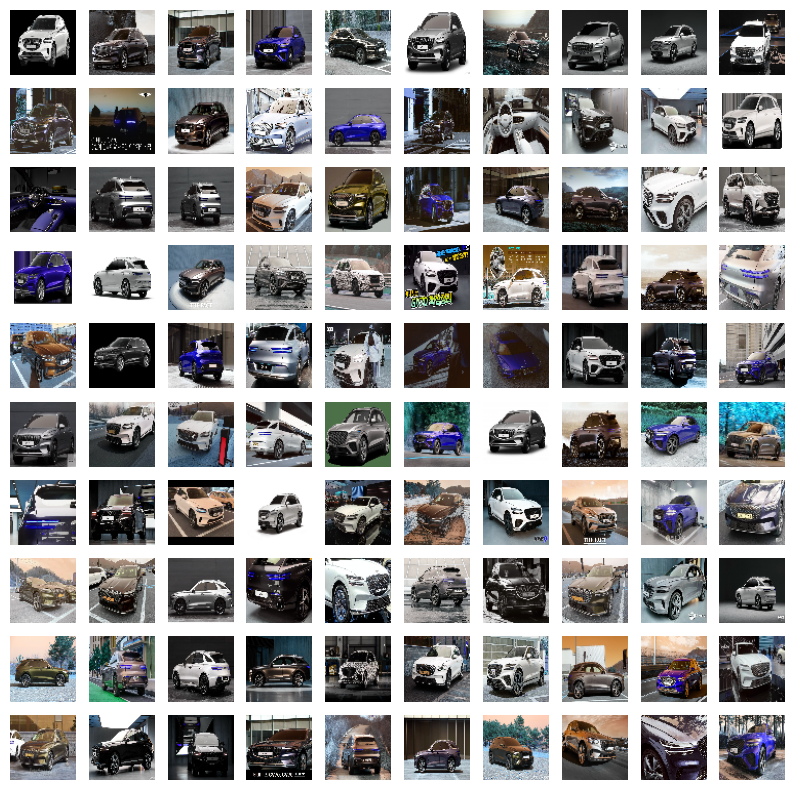

In [29]:
# 시각화로 확인 
_, ax = plt.subplots(10,10, figsize=(10,10))
for i in range(100):
    ax[i//10, i%10].imshow(gen['GV70'][i]/255.0, cmap='gray_r')
    ax[i//10][i%10].axis('off')
plt.show()

In [11]:
# 데이터 저장
np.save("genesis_img1000_128.npy",gen)

In [12]:
# 데이터 불러오기 
gen2 = np.load(("genesis_img1000_128.npy"),allow_pickle=True).item()

In [32]:
# 불러온 데이터 키 값 확인
gen2.keys()

dict_keys(['G70SHOOTINGBRAKE', 'ELECTRIFIEDG80', 'G80', 'G90', 'GV60', 'ELECTRIFIEDGV70', 'GV70', 'GV80', 'G70'])

In [14]:
# image generation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def appendImage(carList):
    imgList = []
    for i in range(len(carList)):  # 매개변수로 입력받은 리스트의 이미지를 다른 리스트에 저장
        imgList.append(np.expand_dims(carList[i],axis=0))  # 단, image generate를 위해 1차원 늘려준다
    generator = ImageDataGenerator(rotation_range=30.0,width_shift_range=0.2,
                                   height_shift_range=0.2,horizontal_flip=True)
    batch_size = 1
    check = 0
    while(check == 0):
        for i in range(len(imgList)):
            if len(carList) >= 1000:  # 600장까지만 append하고 break ->  800개 -> 1000장 
                check = 1
                break
            gen = generator.flow(imgList[i],batch_size=batch_size)  # for문을 통해 이미지 한장씩 generate
            img = gen.next()
            carList.append(img.squeeze())  # 매개변수로 입력받은 리스트에 append (다시 차원 원래대로)

In [15]:
# 이미지 갯수 1000개로 맞추기 전 갯수 확인
print(f"Genesis G70: {len(gen2['G70'])}")
print(f"Genesis G70-SB: {len(gen2['G70SHOOTINGBRAKE'])}")
print(f"Genesis E-G70: {len(gen2['ELECTRIFIEDG80'])}")
print(f"Genesis G80: {len(gen2['G80'])}")
print(f"Genesis G90: {len(gen2['G90'])}")
print(f"Genesis GV60: {len(gen2['GV60'])}")
print(f"Genesis E-GV70: {len(gen2['ELECTRIFIEDGV70'])}")
print(f"Genesis GV70: {len(gen2['GV70'])}")
print(f"Genesis GV80: {len(gen2['GV80'])}")

Genesis G70: 275
Genesis G70-SB: 218
Genesis E-G70: 171
Genesis G80: 276
Genesis G90: 227
Genesis GV60: 275
Genesis E-GV70: 158
Genesis GV70: 283
Genesis GV80: 299


In [16]:
# 이미지 갯수 1000개로 맞춰주기 
appendImage(gen2['G70'])
appendImage(gen2['G70SHOOTINGBRAKE'])
appendImage(gen2['ELECTRIFIEDG80'])
appendImage(gen2['G80'])
appendImage(gen2['G90'])
appendImage(gen2['GV60'])
appendImage(gen2['ELECTRIFIEDGV70'])
appendImage(gen2['GV70'])
appendImage(gen2['GV80'])

In [17]:
# 이미지 갯수 800개 맞는지 확인하기 
print(f"Genesis G70: {len(gen2['G70'])}")
print(f"Genesis G70-SB: {len(gen2['G70SHOOTINGBRAKE'])}")
print(f"Genesis E-G70: {len(gen2['ELECTRIFIEDG80'])}")
print(f"Genesis G80: {len(gen2['G80'])}")
print(f"Genesis G90: {len(gen2['G90'])}")
print(f"Genesis GV60: {len(gen2['GV60'])}")
print(f"Genesis E-GV70: {len(gen2['ELECTRIFIEDGV70'])}")
print(f"Genesis GV70: {len(gen2['GV70'])}")
print(f"Genesis GV80: {len(gen2['GV80'])}")

Genesis G70: 1000
Genesis G70-SB: 1000
Genesis E-G70: 1000
Genesis G80: 1000
Genesis G90: 1000
Genesis GV60: 1000
Genesis E-GV70: 1000
Genesis GV70: 1000
Genesis GV80: 1000


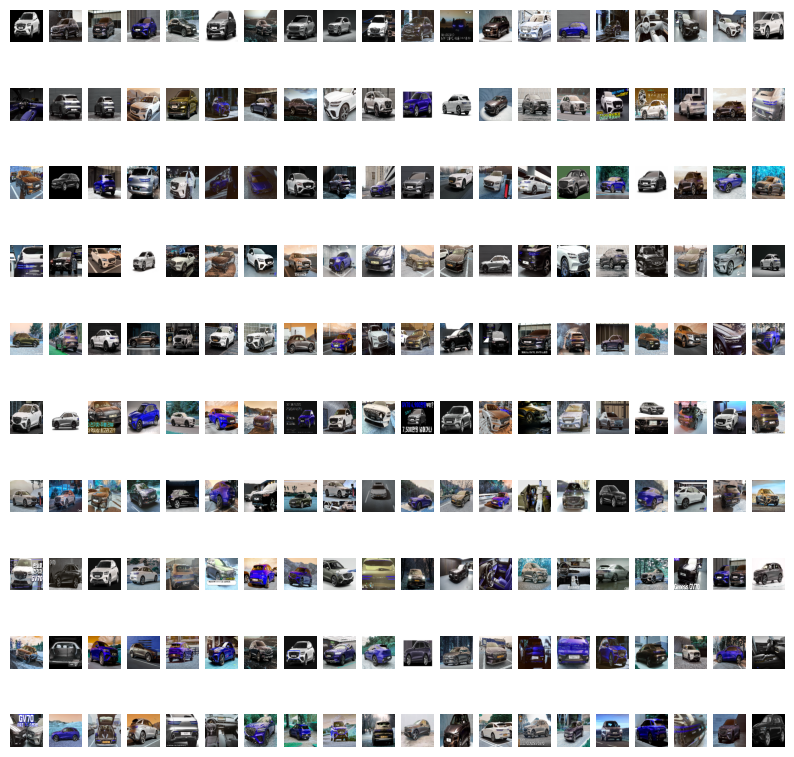

In [18]:
# 시각화로 확인 
_, ax = plt.subplots(10,20, figsize=(10,10))
for i in range(200):
    ax[i//20, i%20].imshow(gen2['GV70'][i]/255.0, cmap='gray_r')
    ax[i//20][i%20].axis('off')
plt.show()

In [19]:
# 데이터 저장하기 
np.save("genesis_img1000_128_2.npy",gen2)